**première chose, nous devons importer les bibliothèques, pour nous permettre d'analyser et de former facilement notre modèle**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### importer les données csv

In [4]:
data=pd.read_csv('BostonHousing.csv')

### explorez les données et vérifiez-les si elles ont une valeur nulle ou une valeur incorrecte en fonction du type de colonne
-  comme nous le voyons ici, nous avons 14 colonnes et chaque colonne a une valeur de 506 entities et toutes ne sont pas nulles et ont le type correct
- il faut identifier la colonne nom, donc une petite recherche dans google nous donne ce résultat
 * crim = crime
 * Zn =  proportion de criminalité sur les terrains résidentiels zonés pour les lots
 * INDUS = proportion de superficies commerciales non commerciales par ville
 * CHAS =Variable muette de Charles River (1 si le tronçon délimite la rivière ; 0 sinon)
 * NOX = concentration d'oxyde nitrique
 * RM =  distances pondérées jusqu'à cinq centres d'emploi de Boston
 * AGE = proportion de logements occupés par leur propriétaire construits avant 1940
 * DIS =distances pondérées jusqu'à cinq centres d'emploi de Boston
 * RAD = indice d'accessibilité aux autoroutes radiales
 * TAX = taux de taxe foncière pleine valeur par 10 000 dollar
 * PTRATIO = ratio élèves/enseignant par ville
 * B = 1000(Bk - 0,63)^2 où Bk est la proportion de noirs par ville
 * LSTST =% statut inférieur de la population
 * MEDV =Valeur médiane des maisons occupées par leur propriétaire en 1 000 dollar

In [5]:
print(data.info())
print(data.head())
print(data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   

voici quelques informations sur nos données, obtenir des échantillons de chaque caractéristique.

In [6]:
data[data.duplicated()==True]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


aucune valeur dupliquée dans toutes les caractéristiques.

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

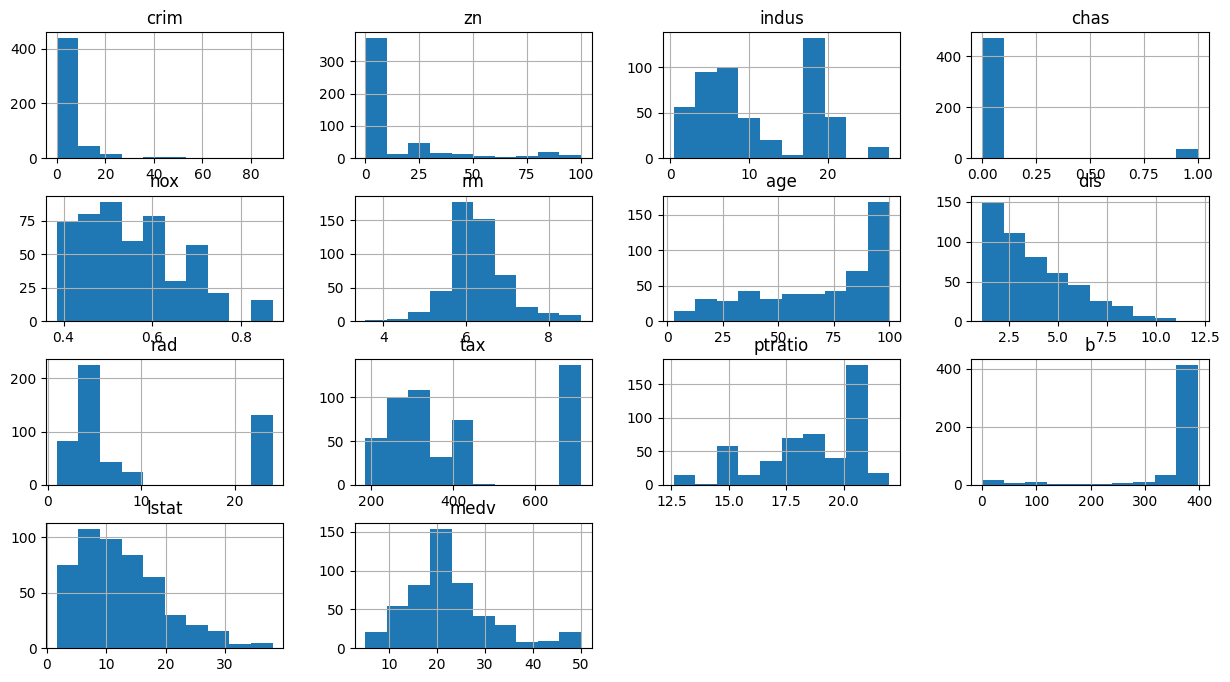

In [7]:
data.hist(figsize=(15,8))

Et ici, nous visualisons les données.

<Axes: >

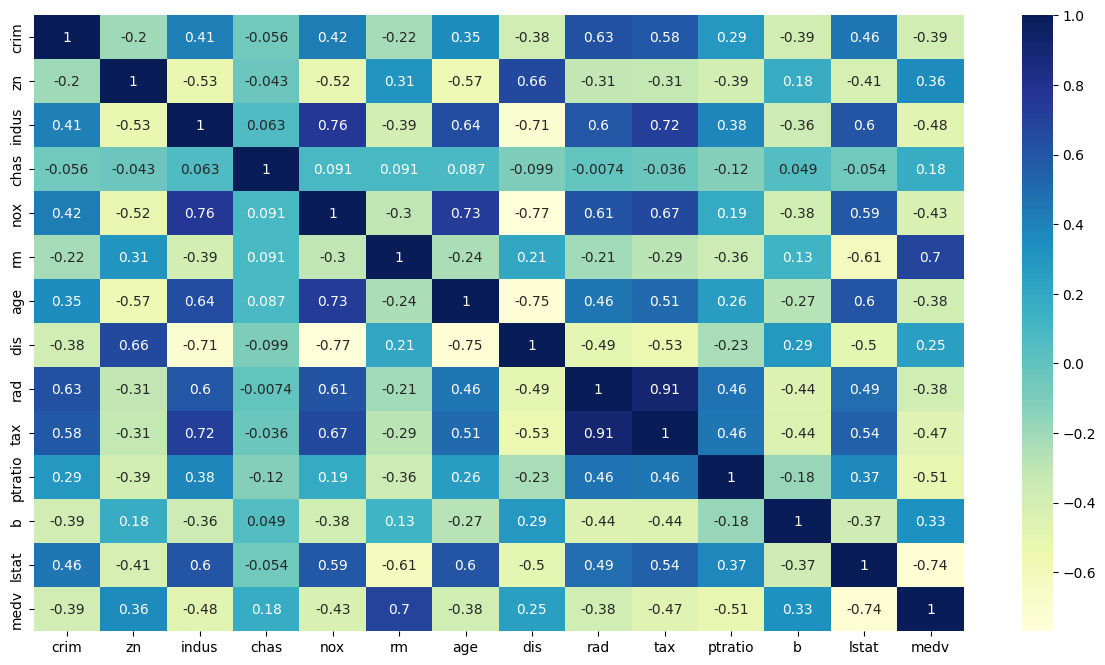

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")


Dans la colonne "medv", nous constatons que "lstat" a moins d'effet sur "medv", tandis que la caractéristique la plus efficace est "rm".

In [9]:

Y = data['medv']
X= data.drop(['medv'],axis=1)


Maintenant, nous devons récupérer la colonne "medv" car c'est la variable Y, et sauvegarder le reste dans la variable X.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

nous devons séparer les données pour l'entraînement et le test.


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,Y_train)

LinearRegression()

Nous commençons l'entraînement du modèle.

In [ ]:
lm.score(X_test,y_test)

0.7317566125217679

Le score du modèle est maintenant de 73 % en utilisant les données d'entraînement. C'est une bonne valeur.

MAE: 3.5965040304338713
MSE: 23.6996604511815
RMSE: 4.8682297040280975


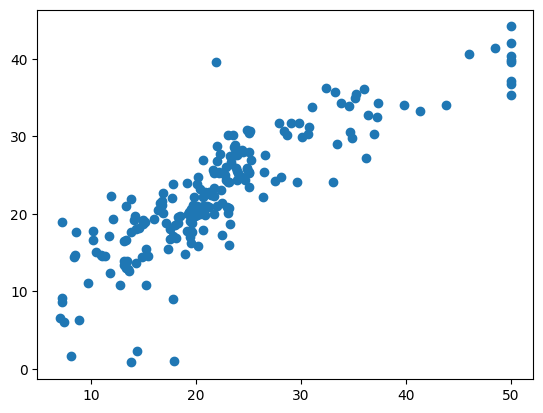

In [ ]:
from sklearn import metrics
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

 je suppose que nous avons des valeurs respectables pour MAE, MSE et EMSE, mais nous pouvons les optimiser.
